In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data/training_data_ht2025.csv')

In [5]:
df.describe()

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility
count,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.0,1600.000000,1600.000000,1600.000000,1600.000000
mean,11.37125,3.022500,6.468750,0.033125,0.710000,0.64375,15.210313,7.750750,63.927844,0.122042,0.0,0.042713,13.082500,64.322375,15.344125
std,6.94837,2.012965,3.454741,0.179019,0.453904,0.47904,9.264785,10.026459,19.079419,0.920600,0.0,0.421198,7.756652,32.748869,2.323737
min,0.00000,0.000000,1.000000,0.000000,0.000000,0.00000,-9.100000,-18.400000,15.850000,0.000000,0.0,0.000000,0.000000,0.000000,0.100000
25%,5.00000,1.000000,3.000000,0.000000,0.000000,0.00000,7.700000,-0.800000,47.845000,0.000000,0.0,0.000000,7.500000,28.800000,16.000000
50%,12.00000,3.000000,6.000000,0.000000,1.000000,1.00000,15.500000,8.300000,65.175000,0.000000,0.0,0.000000,12.300000,79.300000,16.000000
75%,17.00000,5.000000,9.000000,0.000000,1.000000,1.00000,23.200000,16.800000,79.955000,0.000000,0.0,0.000000,17.600000,92.800000,16.000000
max,23.00000,6.000000,12.000000,1.000000,1.000000,1.00000,35.600000,24.300000,99.890000,25.871000,0.0,6.710000,43.800000,100.000000,16.000000


In [6]:
#histograms of all the features
df_feat = df.drop(columns=['increase_stock','hour_of_day','hour_of_day','month','holiday','weekday','summertime','day_of_week'])

In [7]:
df_feat

,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility
0,-7.2,-15.0,53.68,0.000,0,0.0,16.3,31.6,16.0
1,-1.3,-12.8,40.97,0.000,0,0.0,23.9,85.7,16.0
2,26.9,21.8,73.39,0.000,0,0.0,0.0,81.1,16.0
3,3.1,-4.0,59.74,0.000,0,0.0,19.2,0.0,16.0
4,11.7,-11.4,18.71,0.000,0,0.0,10.5,44.6,16.0
...,...,...,...,...,...,...,...,...,...
1595,21.5,19.4,87.68,0.000,0,0.0,10.6,24.4,16.0
1596,23.2,20.1,82.43,2.217,0,0.0,9.8,92.1,10.4
1597,13.9,-2.2,32.93,0.000,0,2.0,18.2,79.3,16.0
1598,11.7,-9.3,22.09,0.000,0,0.0,5.8,24.4,16.0


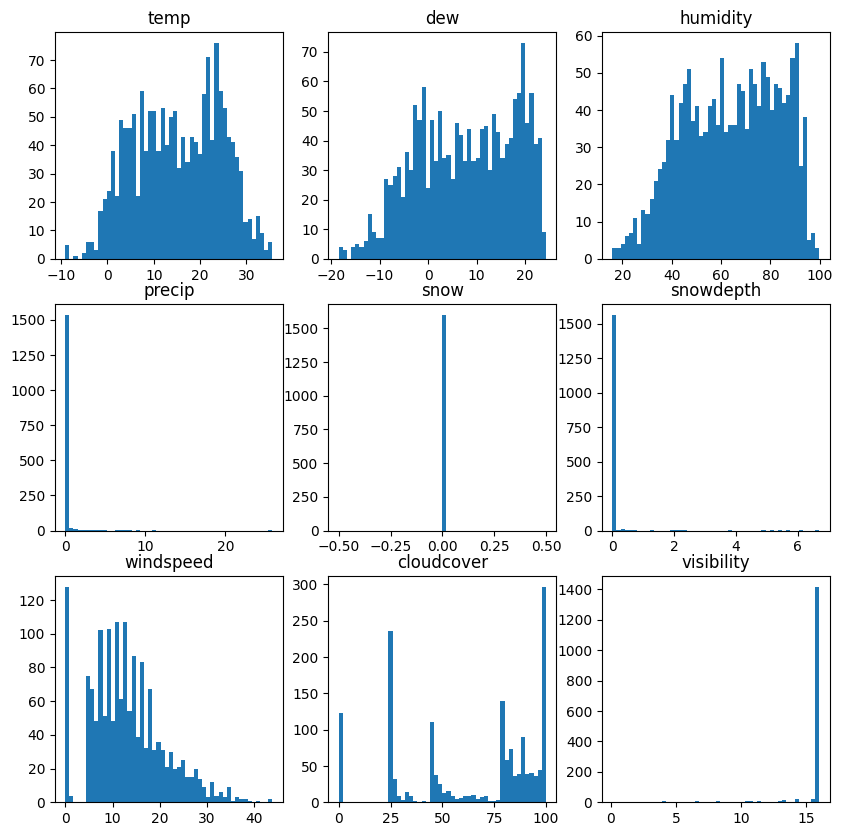

In [8]:
columns = df_feat.columns

figs,axes = plt.subplots(3,3,figsize = (10,10))

for i,ax in enumerate(axes.flatten()):
  ax.hist(df_feat[columns[i]], bins = 50)
  ax.set_title(columns[i])


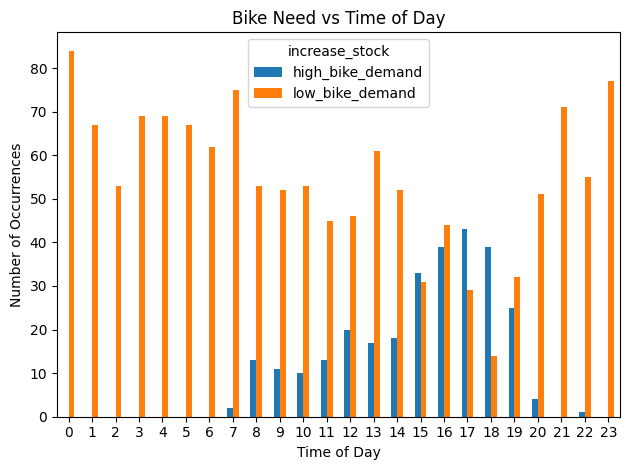

In [9]:
#histogram of different needs depending on time of day
time_counts = pd.crosstab(df['hour_of_day'], df['increase_stock'])

time_counts.plot(kind='bar')
plt.xlabel("Time of Day")
plt.ylabel("Number of Occurrences")
plt.title("Bike Need vs Time of Day")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number of Occurrences')

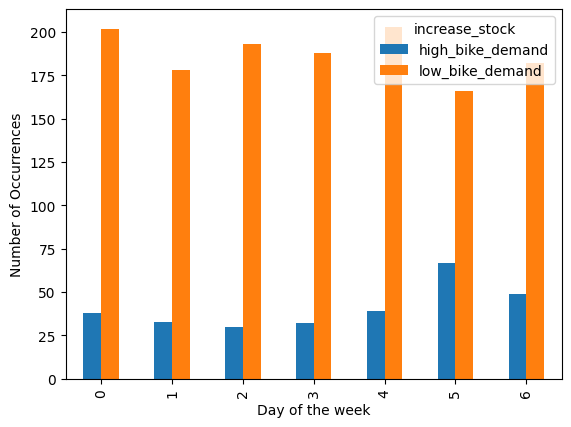

In [10]:
weather_counts = pd.crosstab(df['day_of_week'], df['increase_stock'])
weather_counts.plot(kind = 'bar')
plt.xlabel("Day of the week")
plt.ylabel("Number of Occurrences")

<Axes: xlabel='month'>

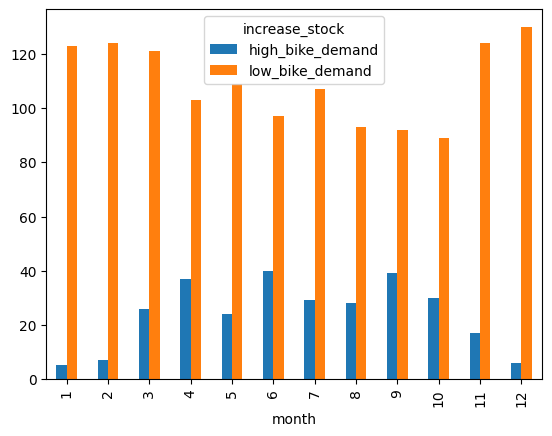

In [11]:
months_counts = pd.crosstab(df['month'], df['increase_stock'])
months_counts.plot(kind = 'bar')

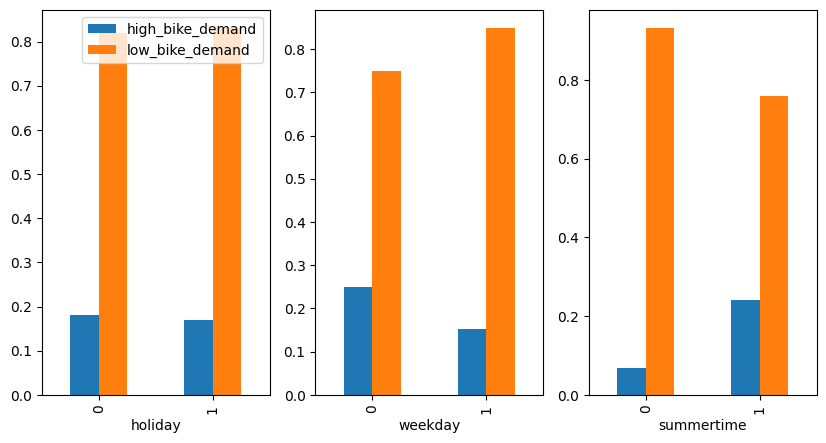

In [12]:
fig,axes = plt.subplots(1,3, figsize = (10,5))
pd.crosstab(df['holiday'],df['increase_stock'], normalize='index').plot(kind = 'bar', ax = axes[0]).legend()
pd.crosstab(df['weekday'],df['increase_stock'], normalize='index').plot(kind = 'bar', ax = axes[1]).legend().set_visible(False)
pd.crosstab(df['summertime'],df['increase_stock'], normalize='index').plot(kind = 'bar', ax = axes[2]).legend().set_visible(False)

/tmp/ipykernel_313790/3071474204.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob = df.groupby("temp_bin")["high"].mean()


Text(0.5, 0, 'temp range')

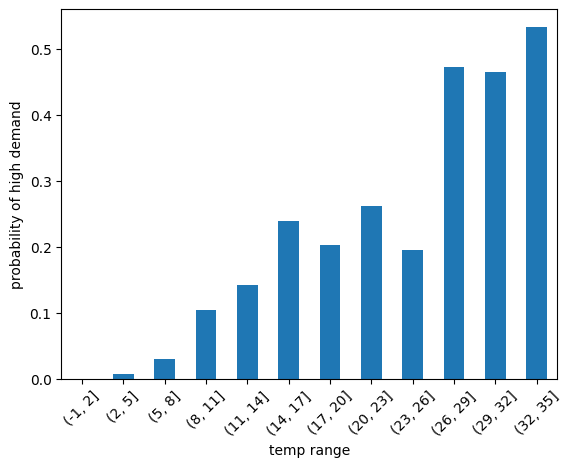

In [13]:
import numpy as np
import pandas as pd

# Convert target into 0/1
df["high"] = (df["increase_stock"] == "high_bike_demand").astype(int)

df["temp_bin"] = pd.cut(df["temp"], bins=np.arange(-1, 37, 3))

# Compute probability
prob = df.groupby("temp_bin")["high"].mean()
prob.plot(kind="bar", rot=45)
plt.ylabel('probability of high demand')
plt.xlabel('temp range')

/tmp/ipykernel_313790/1196140433.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob = df.groupby("humid_bin")["high"].mean()


Text(0.5, 0, 'humidity range')

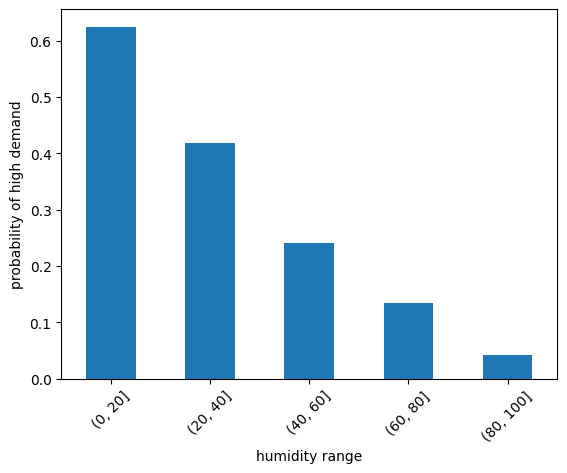

In [14]:
df["humid_bin"] = pd.cut(df["humidity"], bins=np.arange(0, 120, 20))

# Compute probability
prob = df.groupby("humid_bin")["high"].mean()
prob.plot(kind="bar", rot=45)
plt.ylabel('probability of high demand')
plt.xlabel('humidity range')

<Axes: xlabel='is_raining'>

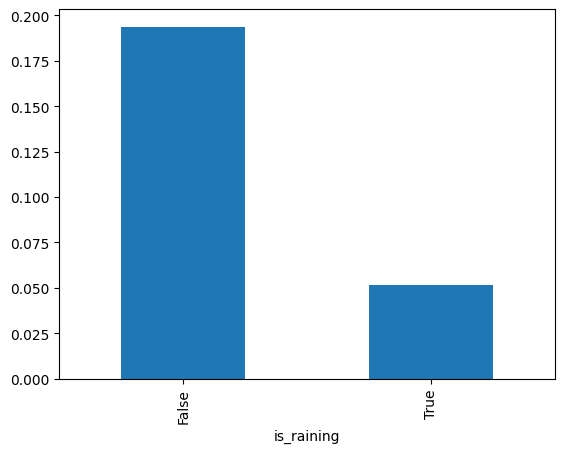

In [ ]:
df['is_raining'] = (df['precip'] > 0).astype(bool)
prob = df.groupby("is_raining")["high"].mean()
prob.plot(kind="bar", )
plt.ylabel('probability of high demand')
plt.xlabel('humidity range')

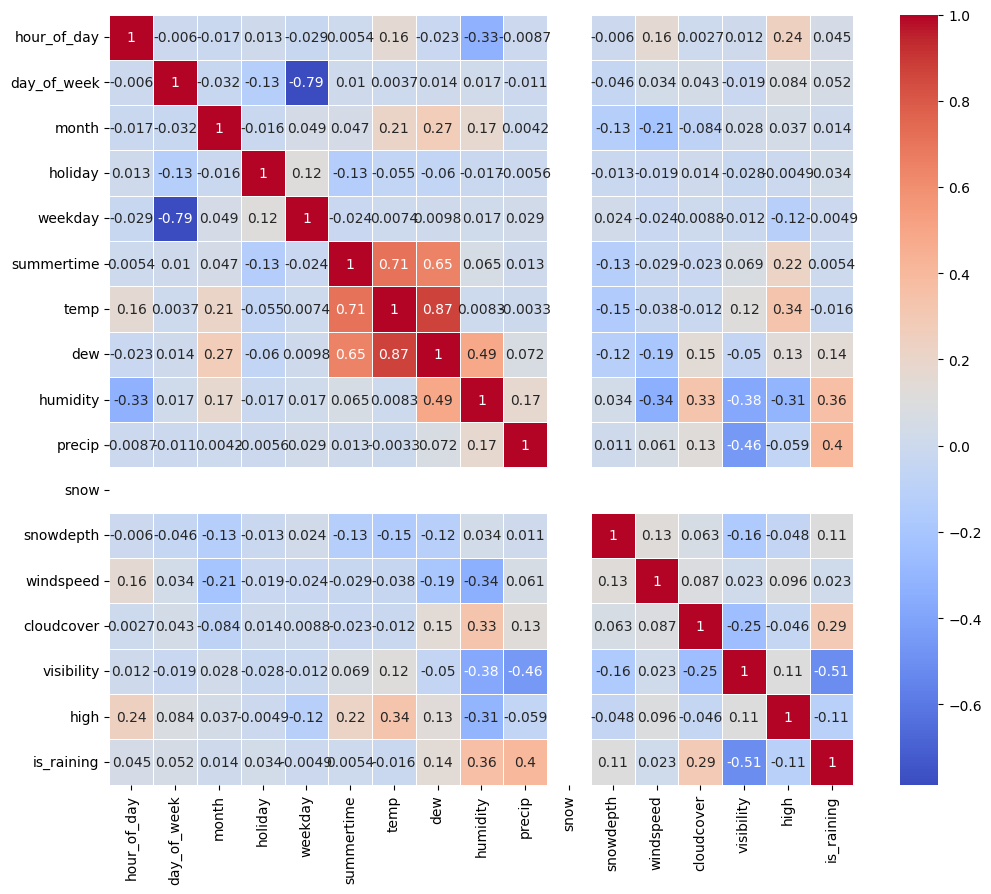

In [16]:
corr = df.corr(numeric_only=True)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()